# Notebook avec différentes expériences

In [1]:
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt
import time
import seaborn as sns
plt.style.use('ggplot')

## Expérience 1 : Dataset aléatoire avec algo DMRG et gradient conjugué

In [2]:
#Importation des fonctions nécessaires
from src.data.make_dataset import make_dataset_easy , make_dataset_random
from src.tensor_network.modelMPS import ModelMPS
from src.tensor.tensor import contractMPS

In [3]:
#Creation dataset
N=10 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("CG")
A.choose_loss_function("quadratic")
A.onesInitialization(5)

#Entrainement du modèle
err=[]
for epoch in range(5):
    err += A.train(data,y)
    print(err[-1])

#Evaluation du modèle
acc = A.accuracy(data,y)

print("Accuracy : ", acc*100 , "%") 

0.01133664702309071
1.154517615704725e-08
9.275607815891161e-15
4.4456612480475724e-20
1.4757570293703488e-24
Accuracy :  100.0 %


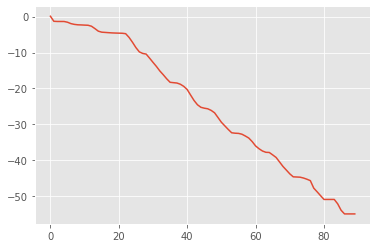

In [4]:
#%matplotlib widget
plt.plot(np.log(err))
plt.show()

## Experience 2 : Test de m lors de l'initialisation

In [5]:
from src.tensor.tensor import contractMPS
from src.mapping.phi import phi , Phi

In [6]:
#Creation dataset
N=100; nbExample=10 ; nbClass=4
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("CG")
A.choose_loss_function("quadratic")

A.onesInitialization(5,data=data,sigma=10**(-2))

for nb in range(nbExample):
    p=Phi(data[nb])
    y_hat=contractMPS(A.W,p)
    print(y_hat)

[1.15810816 1.16197597 1.13646376 1.1476005 ]
[0.06118983 0.06147538 0.06011391 0.06074996]
[0.00659077 0.00662997 0.00648186 0.00655535]
[0.12419974 0.12637645 0.1233607  0.1254742 ]
[0.01105918 0.0110875  0.01084549 0.01094556]
[0.17659965 0.1790919  0.17489853 0.17765976]
[0.02276249 0.0229392  0.02242063 0.02269771]
[0.0469444  0.04727052 0.04620801 0.04675708]
[0.07265753 0.07341263 0.07172935 0.07269967]
[0.12901746 0.12932539 0.12649601 0.12768109]


## Experience 3 :  Comparaison gradient conjugué et gradient pas fixe

In [7]:
#Creation dataset
N=50 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création des modèles
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_loss_function("quadratic")
A.choose_optimizer("CG")
A.onesInitialization(5,goal=0.5)

B = ModelMPS(N,nbClass)
B.choose_algo("DMRG")
B.choose_loss_function("quadratic")
B.choose_optimizer("fixed")
B.onesInitialization(5,goal=0.5)

C = ModelMPS(N,nbClass)
C.choose_algo("DMRG")
C.choose_loss_function("quadratic")
C.choose_optimizer("Adam")
C.onesInitialization(5,goal=0.5)

#Entrainement des modèles
nbEpoch = 3
errA=[]
for epoch in range(nbEpoch):
    errA += A.trainDMRG(data,y)
    print(errA[-1])
    
    
errB=[]
for epoch in range(nbEpoch):
    if(epoch==0):
        errB += B.train(data,y,alpha=0)
    else:
        errB += B.train(data,y,alpha=10**(1))
    print(errB[-1])

nbEpoch = 3
errC=[]
for epoch in range(nbEpoch):
    errC += C.trainDMRG(data,y,alpha=0.1)
    print(errC[-1])
    
#Evaluation du modèle
acc1 = A.accuracy(data,y)
acc2 = B.accuracy(data,y)
acc3 = C.accuracy(data,y)

print("Accuracy A : ", acc1*100 , "%") 
print("Accuracy B : ", acc2*100 , "%") 
print("Accuracy C : ", acc3*100 , "%") 

4.190131080710918e-06
2.672232244414524e-19
2.0682913400646286e-19
1.487634740652472
0.2684922647247693
0.10231467170484843
0.2581724513499775
0.07745726625415095
4.719899345799068e-07
Accuracy A :  100.0 %
Accuracy B :  100.0 %
Accuracy C :  100.0 %


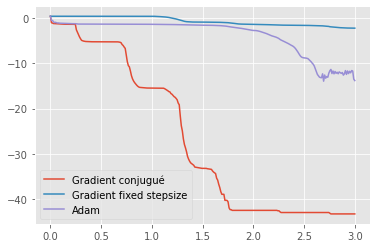

In [7]:
val = np.linspace(0,nbEpoch,len(errA))
plt.plot(val,np.log(errA),label="Gradient conjugué")
plt.plot(val,np.log(errB),label="Gradient fixed stepsize")
plt.plot(val,np.log(errC),label="Adam")
plt.legend()
plt.show()

## Experience 4 : Test sur Npass

0.003969177677080314
1.4324296167730712e-12
4.304355978610165e-06
4.1419259763147016e-17
1.57216238640185e-05
9.799380512592117e-18
Accuracy A:  100.0 % Tps :  -1618487558.4722047  s.
Accuracy B:  100.0 % Tps :  -1618487559.4212577  s.
Accuracy C:  100.0 % Tps :  -1618487560.3403153  s.


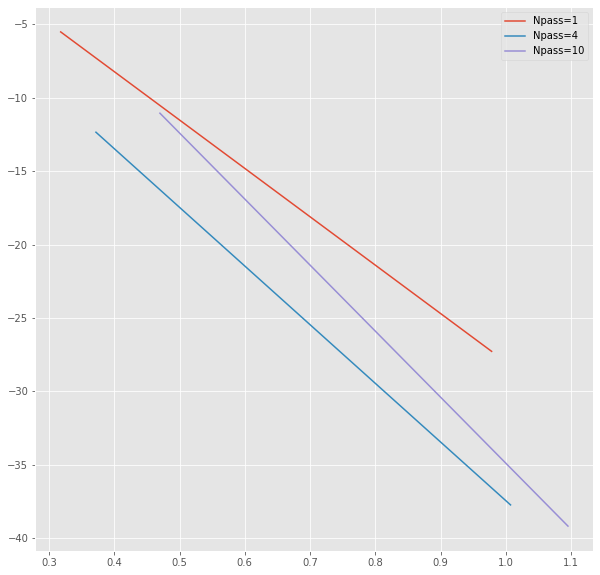

In [9]:
#Creation dataset
N=50 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_loss_function("quadratic")
A.choose_optimizer("CG")
A.onesInitialisation(5,goal=0.5)

B = ModelMPS(N,nbClass)
B.choose_algo("DMRG")
B.choose_loss_function("quadratic")
B.choose_optimizer("CG")
B.onesInitialisation(5,goal=0.5)

C = ModelMPS(N,nbClass)
C.choose_algo("DMRG")
C.choose_loss_function("quadratic")
C.choose_optimizer("CG")
C.onesInitialisation(5,goal=0.5)

#Entrainement du modèle
maxite=10
NpassA=1
errA=[]
t_A=[]
t1_A=time.time()
for epoch in range(maxite):
    errA_t = A.train(data,y,Npass=NpassA)
    print(errA_t[-1])
    errA.append(errA_t[-1])
    t_A.append(time.time()-t1_A)
    if(errA[-1]<10**(-10)):
        break

NpassB=4
errB=[]
t_B=[]
t1_B=time.time()
for epoch in range(maxite):
    errB_t = B.train(data,y,Npass=NpassB)
    print(errB_t[-1])
    errB.append(errB_t[-1])
    t_B.append(time.time()-t1_B)
    if(errB[-1]<10**(-10)):
        break

NpassC=10
errC=[]
t_C=[]
t1_C=time.time()
for epoch in range(maxite):
    errC_t = C.train(data,y,Npass=NpassC)
    print(errC_t[-1])
    errC.append(errC_t[-1])
    t_C.append(time.time()-t1_C)
    if(errC[-1]<10**(-10)):
        break
t2_C=time.time()

#Evaluation du modèle
accA = A.accuracy(data,y)
accB = B.accuracy(data,y)
accC = C.accuracy(data,y)

print("Accuracy A: ", accA*100 , "%", "Tps : ",t_A[-1]-t1_A, " s.") 
print("Accuracy B: ", accB*100 , "%", "Tps : ",t_B[-1]-t1_B, " s.") 
print("Accuracy C: ", accC*100 , "%", "Tps : ",t_C[-1]-t1_C, " s.") 

plt.figure(figsize=(10,10))
plt.plot(t_A,np.log(errA),label=f"Npass={NpassA}")
plt.plot(t_B,np.log(errB),label=f"Npass={NpassB}")
plt.plot(t_C,np.log(errC),label=f"Npass={NpassC}")

plt.legend()
plt.show() 

## Expérience 6 : Test cross-entropy

In [8]:
#Creation dataset
N=50 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("Adam")
A.choose_loss_function("cross-entropy")
A.onesInitialisation(5,data=data)

#Entrainement du modèle
err=[]
for epoch in range(3):
    err += A.train(data,y,alpha=1)
    print(err[-1])

#Evaluation du modèle
acc = A.accuracy(data,y)

print("Accuracy : ", acc*100 , "%") 

0.14177807119927363
1.53211283441176e-06
2.14063395130007e-08
Accuracy :  100.0 %


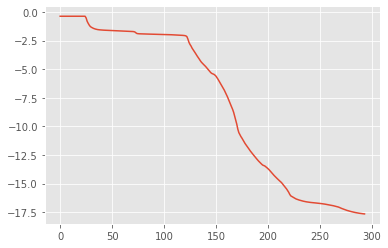

In [9]:
plt.plot(np.log(err))
plt.show()

## Experience 7 : Test log-quadratic

In [14]:
#Creation dataset
N=50 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("Adam")
A.choose_loss_function("log-quadratic")
A.onesInitialisation(5,data=data)

#Entrainement du modèle
err=[]
for epoch in range(3):
    err += A.train(data,y,alpha=0.1,nmethod=1)
    print(err[-1])

#Evaluation du modèle
acc = A.accuracy(data,y)

print("Accuracy : ", acc*100 , "%") 

0.19198694121071408
0.002815394868764809
1.0829903325845638e-06
Accuracy :  100.0 %


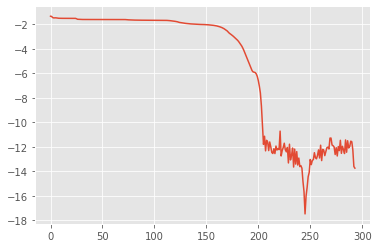

In [15]:
plt.plot(np.log(err))
plt.show()

## Experience 8 : Comparaison Loss-function

In [25]:
#Creation dataset
N=50 ; nbExample=10 ; nbClass=2
data,y = make_dataset_random(N,nbExample,nbClass)

#Création du modèle
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_loss_function("quadratic")
A.choose_optimizer("CG")
A.onesInitialisation(5,data=data)

B = ModelMPS(N,nbClass)
B.choose_algo("DMRG")
B.choose_loss_function("log-quadratic")
B.choose_optimizer("fixed")
B.onesInitialisation(5,data=data)

C = ModelMPS(N,nbClass)
C.choose_algo("DMRG")
C.choose_loss_function("cross-entropy")
C.choose_optimizer("fixed")
C.onesInitialisation(5,data=data)

#Entrainement du modèle
maxite=10
errA=[]
t_A=[]
t1_A=time.time()
for epoch in range(maxite):
    errA_t = A.train(data,y)
    print(errA_t[-1])
    errA.append(errA_t[-1])
    t_A.append(time.time()-t1_A)
    if(errA[-1]<10**(-10)):
        break

NpassB=4
errB=[]
t_B=[]
t1_B=time.time()
for epoch in range(maxite):
    errB_t = B.train(data,y,alpha=10**(2))
    print(errB_t[-1])
    errB.append(errB_t[-1])
    t_B.append(time.time()-t1_B)
    if(errB[-1]<10**(-10)):
        break

NpassC=10
errC=[]
t_C=[]
t1_C=time.time()
for epoch in range(maxite):
    errC_t = C.trainDMRG(data,y,alpha=100000)
    print(errC_t[-1])
    errC.append(errC_t[-1])
    t_C.append(time.time()-t1_C)
    if(errC[-1]<10**(-10)):
        break
t2_C=time.time()

#Evaluation du modèle
accA = A.accuracy(data,y)
accB = B.accuracy(data,y)
accC = C.accuracy(data,y)

print("Accuracy A: ", accA*100 , "%", "Tps : ",t_A[-1], " s.") 
print("Accuracy B: ", accB*100 , "%", "Tps : ",t_B[-1], " s.") 
print("Accuracy C: ", accC*100 , "%", "Tps : ",t_C[-1], " s.") 

6.734318481875467e-06
6.904400936449845e-18
0.22268041136686315
0.07117171711957454
0.040199766973252185
0.023984794421794516
0.021921348833088487
0.018560220048428236
0.012004975354698227
7.741620846958558e-05
2.292314908275921e-06
1.2811611975040604e-07
1.1236541780412066e-06
4.205847850762577e-08
1.7210011194894258e-08
1.0687287796230737e-08
7.760968488531436e-09
6.1064509099543e-09
5.0436622909971915e-09
4.3035675889564054e-09
3.758611764745907e-09
3.3405800152175814e-09
Accuracy A:  100.0 % Tps :  1.010002613067627  s.
Accuracy B:  100.0 % Tps :  8.727986574172974  s.
Accuracy C:  100.0 % Tps :  8.44101071357727  s.


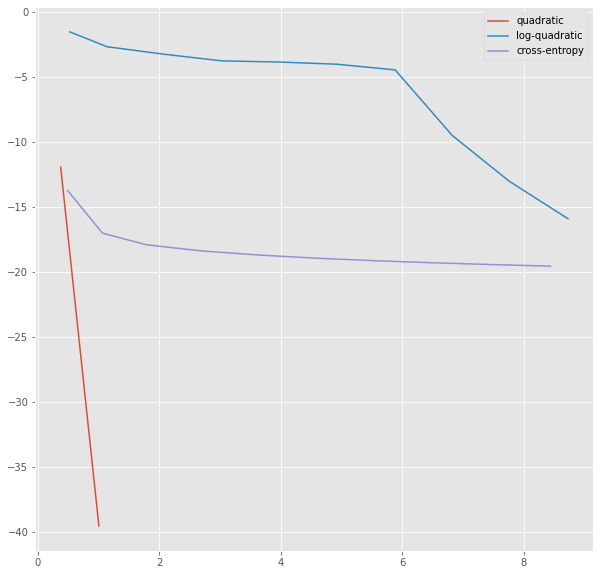

In [26]:
plt.figure(figsize=(10,10))
plt.plot(t_A,np.log(errA),label=f"quadratic")
plt.plot(t_B,np.log(errB),label=f"log-quadratic")
plt.plot(t_C,np.log(errC),label=f"cross-entropy")

plt.legend()
plt.show() 

## Experience 9 : TEST sur MNIST - NMethod=2

In [5]:
from src.data.make_dataset import load_MNIST_dataset_small , convert_one_hot_encoding , load_subpart_MNIST_dataset_small
from src.tensor_network.modelMPS import ModelMPS
from src.tensor.tensor import contractMPS
from src.mapping.phi import phi

In [6]:
#Creation dataset
path="../data"
digits=[0,1] 
nbClass = len(digits)
train_data , test_data , train_labels , test_labels = load_subpart_MNIST_dataset_small(path,digits)
train_labels = convert_one_hot_encoding(train_labels)
test_labels = convert_one_hot_encoding(test_labels)
N=train_data.shape[1]*train_data.shape[2]

In [15]:
A.posL

98

In [7]:
#Plus petit Ensemble
nbExample=100
train_data = train_data[0:nbExample]
train_labels = train_labels[0:nbExample]

test_data = test_data[0:nbExample]
test_labels = test_labels[0:nbExample]

In [8]:
#Création du modèle
#N=49
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("CG")
A.choose_loss_function("quadratic")


A.onesInitialisation2(5,data=train_data,goal=1,sigma=10**(-2)) #A.normalInitialisation(5,0.49)

max_y=np.zeros((nbClass))
for nb in range(nbExample):
    p=Phi(train_data[nb])
    y_hat=contractMPS(A.W,p)
    if(np.linalg.norm(y_hat,2) > np.linalg.norm(max_y,2)):
        max_y=y_hat
print(max_y)

[1.05235593 1.03597406]


Erreur apprentissage : 0.3128892197529202.
Taux de bonne classification ( train ) :  51.0 %
Erreur apprentissage : 0.14428950785071565.
Taux de bonne classification ( train ) :  98.0 %
Erreur apprentissage : 0.093953635810561.
Taux de bonne classification ( train ) :  99.0 %
Erreur apprentissage : 0.07544265684833014.
Taux de bonne classification ( train ) :  99.0 %
Erreur apprentissage : 0.06811855988623555.
Taux de bonne classification ( train ) :  99.0 %


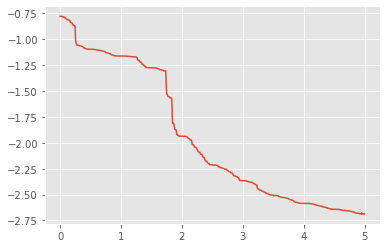

In [9]:
#Entrainement du modèle
err=[]
nbEpoch=5
batch_size=10
for epoch in range(nbEpoch):
    #perm = np.random.choice(range(100), batch_size)
    #data_e = train_data[perm] ; label_e = train_labels[perm]
    err +=  A.train(train_data,train_labels,Npass=4,nmethod=2,cutoff=10**(-10),maxalpha=10) 
    print(f"Erreur apprentissage : {err[-1]}.")

    #Evaluation du modèle
    acc = A.accuracy(train_data,train_labels)
    print("Taux de bonne classification ( train ) : ", acc*100 , "%") 


val = np.linspace(0,nbEpoch,len(err))
plt.plot(val,np.log(err))
plt.show()

In [10]:
acc = A.accuracy(test_data,test_labels)
print("Taux de bonne classification ( test ) : ", acc*100 , "%") 

Taux de bonne classification ( test ) :  95.0 %


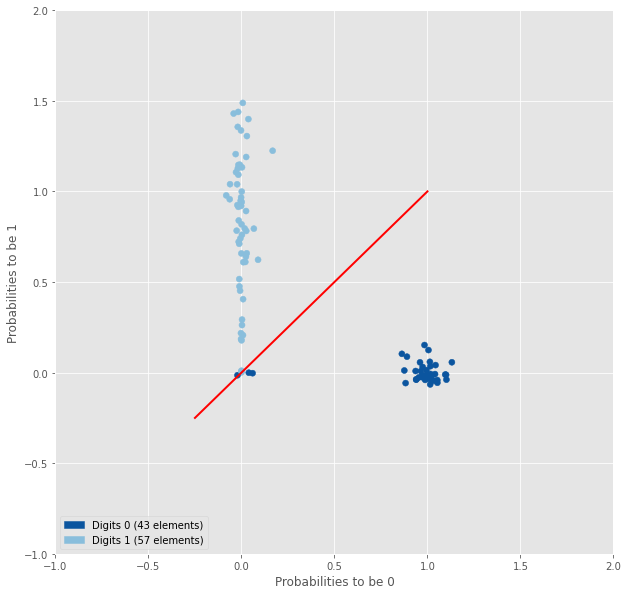

In [11]:
import matplotlib.patches as mpatches

y_hat = A.predict(train_data)

color=np.apply_along_axis(np.argmax, 1, train_labels)

colormap = np.array(['#0b559f', '#89bedc','red','brown'])

plt.figure(figsize=(10,10))

plt.plot([-0.25, 1.0], [-0.25, 1.0], 'r-', lw=2) # Red straight line
plt.scatter(y_hat[:,0],y_hat[:,1],c=colormap[color])
plt.xlim(-1,2)
plt.ylim(-1,2)

plt.xlabel("Probabilities to be 0")
plt.ylabel("Probabilities to be 1")

unique, counts = np.unique(color, return_counts=True)
digits_0 = mpatches.Patch(color='#0b559f', label=f'Digits 0 ({counts[0]} elements)')
digits_1 = mpatches.Patch(color='#89bedc', label=f'Digits 1 ({counts[1]} elements)')

plt.legend(handles=[digits_0,digits_1],loc="lower left")

In [15]:
predict_label=np.apply_along_axis(np.argmax, 1, y_hat)
valid = np.zeros((2,1),dtype=np.float64)
count = np.zeros((2,1),dtype=np.float64)
for i in range(100):
    count[color[i]]+=1
    valid[color[i]]+= (predict_label[i]==color[i])*1
print(valid/count)

[[1.        ]
 [0.94736842]]


In [84]:
count

array([[24.],
       [31.],
       [21.],
       [24.]])

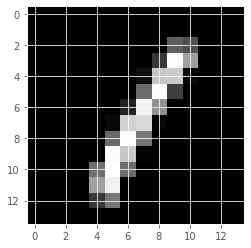

In [26]:
plt.imshow(train_data[1],cmap="gray")

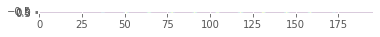

In [33]:
plt.imshow(train_data[1].flatten().reshape(1,196))

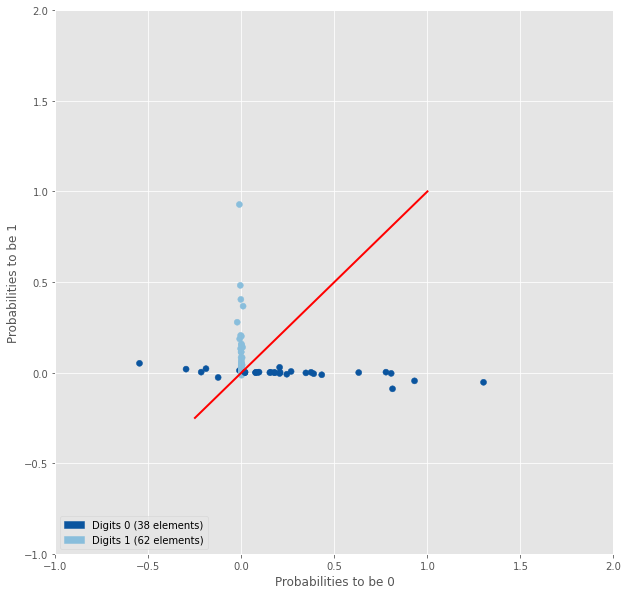

In [16]:
import matplotlib.patches as mpatches

y_hat = A.predict(test_data)

color=np.apply_along_axis(np.argmax, 1, test_labels)

colormap = np.array(['#0b559f', '#89bedc'])

plt.figure(figsize=(10,10))

plt.plot([-0.25, 1.0], [-0.25, 1.0], 'r-', lw=2) # Red straight line
plt.scatter(y_hat[:,0],y_hat[:,1],c=colormap[color])
plt.xlim(-1,2)
plt.ylim(-1,2)

plt.xlabel("Probabilities to be 0")
plt.ylabel("Probabilities to be 1")

unique, counts = np.unique(color, return_counts=True)
digits_0 = mpatches.Patch(color='#0b559f', label=f'Digits 0 ({counts[0]} elements)')
digits_1 = mpatches.Patch(color='#89bedc', label=f'Digits 1 ({counts[1]} elements)')

plt.legend(handles=[digits_0,digits_1],loc="lower left")

In [19]:
#Création du modèle
N=196
B = ModelMPS(N,nbClass)
B.choose_algo("DMRG")
B.choose_optimizer("Adam")
B.choose_loss_function("quadratic")


B.onesInitialisation(5,data=train_data,goal=1) #A.normalInitialisation(5,0.49)

max_y=np.zeros((nbClass))
for nb in range(nbExample):
    p=Phi(train_data[nb])
    y_hat=contractMPS(B.W,p)
    if(np.linalg.norm(y_hat,2) > np.linalg.norm(max_y,2)):
        max_y=y_hat
print(max_y)

[1. 1.]


Erreur apprentissage : 0.4547942136998828.
Taux de bonne classification ( train ) :  34.0 %
Erreur apprentissage : 0.45393700942944.
Taux de bonne classification ( train ) :  32.0 %


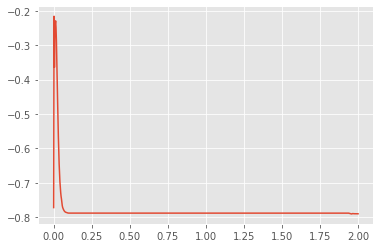

In [20]:
#Entrainement du modèle
err=[]
nbEpoch=2
batch_size=10
for epoch in range(nbEpoch):
    #perm = np.random.choice(range(100), batch_size)
    #data_e = train_data[perm] ; label_e = train_labels[perm]
    err +=  B.train(train_data,train_labels,alpha=1,nmethod=1,Npass=5) 
    print(f"Erreur apprentissage : {err[-1]}.")

    #Evaluation du modèle
    acc = B.accuracy(train_data,train_labels)
    print("Taux de bonne classification ( train ) : ", acc*100 , "%") 


val = np.linspace(0,nbEpoch,len(err))
plt.plot(val,np.log(err))
plt.show()

In [10]:
acc = B.accuracy(test_data,test_labels)
print("Taux de bonne classification ( test ) : ", acc*100 , "%") 

Taux de bonne classification ( test ) :  64.0 %


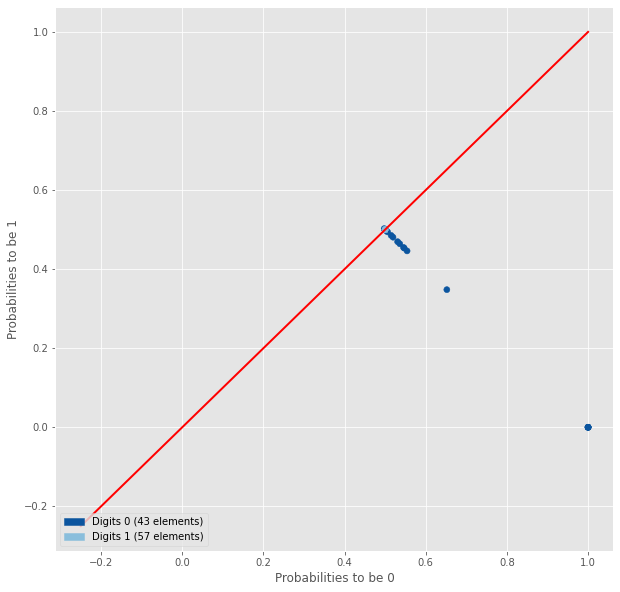

In [11]:
import matplotlib.patches as mpatches

y_hat = B.predict(train_data)

color=np.apply_along_axis(np.argmax, 1, train_labels)

colormap = np.array(['#0b559f', '#89bedc'])

plt.figure(figsize=(10,10))

plt.plot([-0.25, 1.0], [-0.25, 1.0], 'r-', lw=2) # Red straight line
plt.scatter(y_hat[:,0],y_hat[:,1],c=colormap[color])

plt.xlabel("Probabilities to be 0")
plt.ylabel("Probabilities to be 1")

unique, counts = np.unique(color, return_counts=True)
digits_0 = mpatches.Patch(color='#0b559f', label=f'Digits 0 ({counts[0]} elements)')
digits_1 = mpatches.Patch(color='#89bedc', label=f'Digits 1 ({counts[1]} elements)')

plt.legend(handles=[digits_0,digits_1],loc="lower left")

In [38]:
for i in range(100):
    print(f"Prediction : {np.round(y_hat[i,:],2)} Realité {train_labels[i]}")

Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.51 0.49] Realité [0 1]
Prediction : [0.14 0.86] Realité [0 1]
Prediction : [0.15 0.85] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.41 0.59] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [0 1]
Prediction : [0.04 0.96] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0. 1.] Realité [0 1]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0.5 0.5] Realité [1 0]
Prediction : [0. 1.] Realité [0 1]
Predict

## Experience 10 : Test sur MNIST - image 7 par 7

In [9]:
#Creation dataset
path="../data"
digits=[0,1,2,3,4,5,6,7,8,9] ; nbClass = len(digits)
train_data , test_data , train_labels , test_labels = load_subpart_MNIST_dataset_small(path,digits)
train_labels = convert_one_hot_encoding(train_labels)
test_labels = convert_one_hot_encoding(test_labels)
N=train_data.shape[1]*train_data.shape[2]

NameError: name 'load_subpart_MNIST_dataset_small' is not defined

In [42]:
#Plus petit Ensemble
nbExample=100
train_data = train_data[0:nbExample]
train_labels = train_labels[0:nbExample]

test_data = test_data[0:nbExample]
test_labels = test_labels[0:nbExample]

In [43]:
new_train_data=np.zeros((nbExample,7,7))
for k in range(nbExample):
    for i in range(0,14,2):
        for j in range(0,14,2):
            new_train_data[k,int(i/2),int(j/2) ] = (train_data[k,i,j] + train_data[k,i+1,j] + train_data[k,i,j+1] + train_data[k,i+1,j+1])/4

new_test_data=np.zeros((nbExample,7,7))
for k in range(nbExample):
    for i in range(0,14,2):
        for j in range(0,14,2):
            new_test_data[k,int(i/2),int(j/2) ] = (test_data[k,i,j] + test_data[k,i+1,j] + test_data[k,i,j+1] + test_data[k,i+1,j+1])/4

In [55]:
#Création du modèle
N=49
A = ModelMPS(N,nbClass)
A.choose_algo("DMRG")
A.choose_optimizer("CG")
A.choose_loss_function("quadratic")


A.onesInitialisation(5,data=new_train_data,goal=1) #A.normalInitialisation(5,0.49)

max_y=np.zeros((nbClass))
for nb in range(nbExample):
    p=Phi(new_train_data[nb])
    y_hat=contractMPS(A.W,p)
    if(np.linalg.norm(y_hat,2) > np.linalg.norm(max_y,2)):
        max_y=y_hat
print(max_y)

[1. 1.]


Erreur apprentissage : 0.04224656384814957.
Taux de bonne classification ( train ) :  100.0 %
Erreur apprentissage : 0.004319993865050986.
Taux de bonne classification ( train ) :  100.0 %
Erreur apprentissage : 0.0013050416415472488.
Taux de bonne classification ( train ) :  100.0 %
Erreur apprentissage : 0.0007790087908176892.
Taux de bonne classification ( train ) :  100.0 %


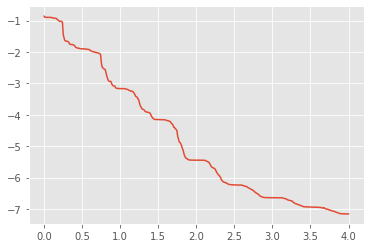

In [56]:
#Entrainement du modèle
err=[]
nbEpoch=4
batch_size=10
for epoch in range(nbEpoch):
    #perm = np.random.choice(range(100), batch_size)
    #data_e = train_data[perm] ; label_e = train_labels[perm]
    err +=  A.train(new_train_data,train_labels,Npass=4,nmethod=1) 
    print(f"Erreur apprentissage : {err[-1]}.")

    #Evaluation du modèle
    acc = A.accuracy(new_train_data,train_labels)
    print("Taux de bonne classification ( train ) : ", acc*100 , "%") 


val = np.linspace(0,nbEpoch,len(err))
plt.plot(val,np.log(err))
plt.show()

In [57]:
acc = A.accuracy(new_test_data,test_labels)
print("Taux de bonne classification ( test ) : ", acc*100 , "%") 

Taux de bonne classification ( test ) :  99.0 %


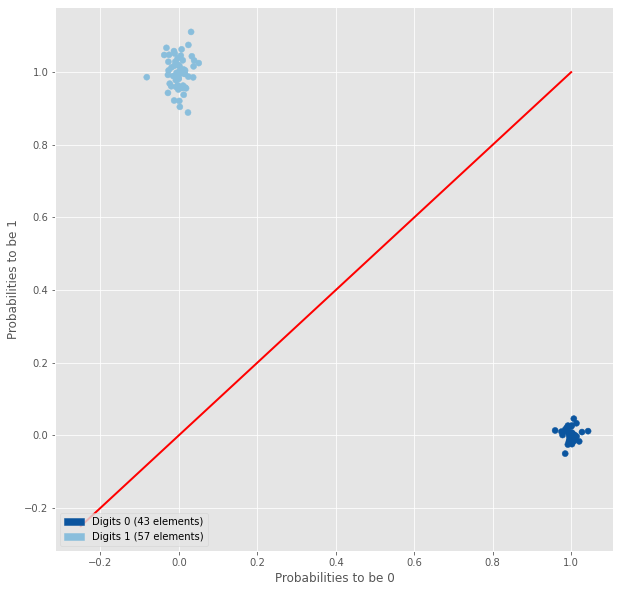

In [58]:
import matplotlib.patches as mpatches

y_hat = A.predict(new_train_data)

color=np.apply_along_axis(np.argmax, 1, train_labels)

colormap = np.array(['#0b559f', '#89bedc'])

plt.figure(figsize=(10,10))

plt.plot([-0.25, 1.0], [-0.25, 1.0], 'r-', lw=2) # Red straight line
plt.scatter(y_hat[:,0],y_hat[:,1],c=colormap[color])

plt.xlabel("Probabilities to be 0")
plt.ylabel("Probabilities to be 1")

unique, counts = np.unique(color, return_counts=True)
digits_0 = mpatches.Patch(color='#0b559f', label=f'Digits 0 ({counts[0]} elements)')
digits_1 = mpatches.Patch(color='#89bedc', label=f'Digits 1 ({counts[1]} elements)')

plt.legend(handles=[digits_0,digits_1],loc="lower left")

In [44]:
#Création du modèle
N=49
B = ModelMPS(N,nbClass)
B.choose_algo("DMRG")
B.choose_optimizer("Adam")
B.choose_loss_function("cross-entropy")


B.onesInitialisation(5,data=new_train_data,goal=1) #A.normalInitialisation(5,0.49)

max_y=np.zeros((nbClass))
for nb in range(nbExample):
    p=Phi(new_train_data[nb])
    y_hat=contractMPS(B.W,p)
    if(np.linalg.norm(y_hat,2) > np.linalg.norm(max_y,2)):
        max_y=y_hat
print(max_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Erreur apprentissage : 1.615894743536095.
Taux de bonne classification ( train ) :  51.0 %
Erreur apprentissage : 0.5174563294980797.
Taux de bonne classification ( train ) :  88.0 %
Erreur apprentissage : 0.019241652053049573.
Taux de bonne classification ( train ) :  100.0 %
Erreur apprentissage : 4.2553889527319175e-06.
Taux de bonne classification ( train ) :  100.0 %


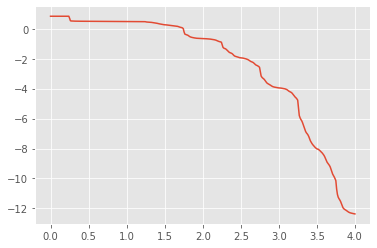

In [45]:
#Entrainement du modèle
err=[]
nbEpoch=4
batch_size=10
for epoch in range(nbEpoch):
    #perm = np.random.choice(range(100), batch_size)
    #data_e = train_data[perm] ; label_e = train_labels[perm]
    err +=  B.train(new_train_data,train_labels,alpha=1) 
    print(f"Erreur apprentissage : {err[-1]}.")

    #Evaluation du modèle
    acc = B.accuracy(new_train_data,train_labels)
    print("Taux de bonne classification ( train ) : ", acc*100 , "%") 


val = np.linspace(0,nbEpoch,len(err))
plt.plot(val,np.log(err))
plt.show()

In [46]:
acc = B.accuracy(new_test_data,test_labels)
print("Taux de bonne classification ( test ) : ", acc*100 , "%") 

Taux de bonne classification ( test ) :  67.0 %


In [40]:
import matplotlib.patches as mpatches

y_hat = B.predict(new_train_data)

color=np.apply_along_axis(np.argmax, 1, train_labels)

colormap = np.array(['#0b559f', '#89bedc'])

plt.figure(figsize=(10,10))

plt.plot([-0.25, 1.0], [-0.25, 1.0], 'r-', lw=2) # Red straight line
plt.scatter(y_hat[:,0],y_hat[:,1],c=colormap[color])

plt.xlabel("Probabilities to be 0")
plt.ylabel("Probabilities to be 1")

unique, counts = np.unique(color, return_counts=True)
digits_0 = mpatches.Patch(color='#0b559f', label=f'Digits 0 ({counts[0]} elements)')
digits_1 = mpatches.Patch(color='#89bedc', label=f'Digits 1 ({counts[1]} elements)')

plt.legend(handles=[digits_0,digits_1],loc="lower left")

IndexError: index 2 is out of bounds for axis 0 with size 2